<font size = 4.5>The data science process:</font>

<font color = black size = 4.5>    
    - Define the problem
    - Gather data
    - Explore the data
    - Model the data
    - Evaluate the model
    - Answer the problem
</font>

<font color = blue size = 4.5>Defining the problem</font>

<font color = black size = 4.5>Train a classification model to predict lego sub-reddits, while minimizing the model’s variance.  Here we test and tune on two different models, Multinomial Naive Bayes, and Random Forest Classification.  Note that Niave Bayes outperforms the Random Forest, in this case.</font>

<font color = blue size = 4.5>Gather data</font>

<font color = black size = 4.5>The positive data came from three sub-reddits, r/lego, r/legos, r/legostarwars.  Within these sub-reddits, the main body is almost always populated with pictures.  Thus, the significant text associated with these posts is located in the titles feature.  So, we choose to focus on this feature to learn the unique language surrounding these sub-reddits.  As a benefit, there are very few posts with hashtags or emojis.</font>

<font color = black size = 4.5>The negative class came from three sub-reddits, r/popular, r/Pictures, r/nostalgc.  Note that the 'title' category was also used to train to keep things consistent across the positive and negative categories.</font>
    
<font color = black size = 4.5>In this section we pull data from three sub-reddits concerned with lego.  These sub-reddits are lego, legos, and legostarwars.  After obtaining this data we determine the number of data points we have for the positive class and pull random reddit posts from two sub-reddits, popular and Pictures, to use in the training data as the negative category.
</font>

<font size = 3>
    Note: We initially got our direction for handling the PRAW wrapper from the site http://www.storybench.org/how-to-scrape-reddit-with-python/, written by Felippe Rodrigues on March 12, 2018.  We use this wrapper to pull data from Reddit.  Some of the steps taken at this point were as follows:
</font>

<font color = black size = 4.5>
    - Create a Reddit account
    - "The very first thing you’ll need to do is “Create an App” within Reddit to get the OAuth2 keys to access the API. It is easier than you think." - Rodrigues
    - instantiate the reddit instance
    - call the sub-reddits in the lego categories
    - fix the date column
</font>

<font color = blue size = 4.5>Exploring the data:</font>
    
    
<font color = black size = 4.5>First, we explored the data when asking ourselves if we had enough data, then in determining the amount of training data needed from the negative class, and finally when performing EDA.</font>
    
<font color = black size = 4.5>First, because we are using the 'title' feature, we determined it was necessary to have lots of data.  So, we pulled 5000 posts from each subreddit.  The PRAW wrapper supported 5 different categories, 'top', 'hot', 'new', 'controversial', and 'gilded'.  From each we pulled from reddit a total of 1000 posts.  However, there were some duplicates.  So, we sorted through all of the posts, using the 'id' feature, and pulled out all of the duplicates.  After this process was completed, we were left with about 6500 unique documents.  From this, we went in and pulled from the two sub-reddits used in the negative class for training.  We were able to get almost the same number of posts in both classes.  So, we are happy with our balance.  In summery, we have 13081 total data points to use in constructing our model.</font>

<font color = blue size = 4.5>Model the data:</font>
    
<font color = black size = 4.5>A CountVectorizer with 'english' stop words is used to tokenize the data.  During the lengthy tuning of the models, we also tried not using 'english' stopwords.  But, within the gridsearch the 'english' stopwords always prevailed.</font>

<font color = blue size = 4.5>Evaluate the model:</font>

<font color = black size = 4.5>
    
    A voting classifier was used over 2 different models, 
        - Multinomial Naive Bayes, and
        - Random Forest.  
</font>

<font color = black size = 4.5>We note at this time that the accuracy was used to determine which model performed the best.  This is ideal in this case because the goal is to reduce all possible false predictions.
        
        The bagged Multinumial Naive Bayes with parameters alpha=1.0, class_prior=None, and fit_prior=True yielded the model with the least variance.
</font>


<font color = blue size = 4.5>Answer the question:</font>
    
<font color = black size = 4.5>IN conclusion, the Navie Bayes model was able to reduce the variance significantly. At this time it is my recommendation that this model be adopted when classifying reddit posts related with lego sub-reddits.  It is very likely that in a more general context of classifying reddit posts the Niave Bayes model will be the best candidate.</font>
    
    

- personal use script (OnvJDrnt8doq4w)
- secret key <font color = Black size = 0.1>(0xQvVRkHk5RnLNATJMFXK5EPTFk)</font>

In [4]:
# !pip install praw #this code installed praw from anaconda

"Each subreddit has five different ways of organizing the topics created by redditors: 

`.hot`, `.new`, ```.controversial```, ```.top```, and `.gilded`. 

You can also use .search("SEARCH_KEYWORDS") to get only results matching an engine search." - Rodrigues

<font color = blue size = 5.5>
    Gathering data
</font>

<font color = blue>
    In what follows are copies of the code blocks that were ran to generate the data.  
</font>

In [177]:
import praw   # Python Reddit API Wrapper
import pandas as pd
import numpy as np

import datetime as dt
import time

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#for visualizations
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline



In [6]:
# this is pulling data from the subreddit category for Lego Star Wars

start_time = time.time()


reddit = praw.Reddit(client_id='OnvJDrnt8doq4w', \
                     client_secret='0xQvVRkHk5RnLNATJMFXK5EPTFk', \
                     user_agent='Blake Wallace', \
                     username='Bw1097246', \
                     password='Bw00436948$')

# instantiating a subreddit
subreddit = reddit.subreddit('legostarwars')

# pulling from the subreddit in the five diffeent categories.  Note the 4 second intervals between each pull from reddit.
top_subreddit = subreddit.top(limit=1000);


time.sleep(4)
hot_subreddit = subreddit.hot(limit=1000);


time.sleep(4)
new_subreddit = subreddit.new(limit=1000);


time.sleep(4)
controversial_subreddit = subreddit.controversial(limit=1000);


time.sleep(4)
gilded_subreddit = subreddit.controversial(limit=1000);




lst = ['top_subreddit', 'hot_subreddit', 'new_subreddit', 'controversial_subreddit', 'gilded_subreddit']
# lst = ['top_subreddit', 'hot_subreddit']

data_dict = {
    'title'    : [],
    'score'    : [],
    'id'       : [],
    'url'      : [],
    'comms_num': [],
    'created'  : [],
    'body'     : [],
    'category' : [],
    'class'    : []
}

duplicates_dict = {
    'title'    : [],
    'score'    : [],
    'id'       : [],
    'url'      : [],
    'comms_num': [],
    'created'  : [],
    'body'     : [],
    'category' : [],
    'class'    : []
}


for item in lst:
    print(f'category for Lego Star Wars: {item}')
    for submission in eval(item):
#         print(submission, submission.id)
        if submission.id in set(data_dict['id']):
            duplicates_dict['title'].append(submission.title)
            duplicates_dict['score'].append(submission.score)
            duplicates_dict['id'].append(submission.id)
            duplicates_dict['url'].append(submission.url)
            duplicates_dict['comms_num'].append(submission.num_comments)
            duplicates_dict['created'].append(submission.created)
            duplicates_dict['body'].append(submission.selftext)
            duplicates_dict['category'].append(item)
            duplicates_dict['class'] = 1
        
        else:
#             print(submission)
            data_dict['title'].append(submission.title)
            data_dict['score'].append(submission.score)
            data_dict['id'].append(submission.id)
            data_dict['url'].append(submission.url)
            data_dict['comms_num'].append(submission.num_comments)
            data_dict['created'].append(submission.created)
            data_dict['body'].append(submission.selftext)
            data_dict['category'].append(item)
            data_dict['class'] = 1
#             print(item)
# print(len(data_dict['id']))
            


# constructing a data frame from the data
positive_data = pd.DataFrame(data_dict)


# This function is taken from Rodrigues' website.  It converts the initial time stamp, which is a UNIX timestamp,
# into something we can understand.
def get_date(created):
    return dt.datetime.fromtimestamp(created)


applying the timestamp function to create a new row.  This is how Rodrigues did it.  We follow his lead.
_timestamp = positive_data['created'].apply(get_date)


# Now, we create a new row in the dataframe to hold the new time stamp information
positive_data = positive_data.assign(timestamp = _timestamp)


print()
print(f'The totle number of posts pulled from the surver: {len(data_dict["id"]) + len(duplicates_dict["id"])}')
print()
print(f'The number of unique posts in the new dictionary: {len(data_dict["id"])}')
print(f'The number of posts in the duplicates dictionary: {len(duplicates_dict["id"])}')
print()
print(f'Our new dataframe is defined as: positive_data')



end_time = round(time.time() - start_time, 3)
print(f'time: {end_time} seconds')
end_time_minutes = int(end_time/ 60)
end_time_seconds = round(end_time % 60, 3)

print(f'time: {end_time_minutes} minutes, {end_time_seconds} seconds')
      
      

category for Lego Star Wars: top_subreddit
category for Lego Star Wars: hot_subreddit
category for Lego Star Wars: new_subreddit
category for Lego Star Wars: controversial_subreddit
category for Lego Star Wars: gilded_subreddit

The totle number of posts pulled from the surver: 4934

The number of unique posts in the new dictionary: 2663
The number of posts in the duplicates dictionary: 2271

Our new dataframe is defined as: positive_data
time: 130.316 seconds
time: 2 minutes, 10.316 seconds


<font color = blue size = 4.5>
    This is the initial data pulled from the Star Wars Lego sub-reddit for the positive category.  We will pull more data from the larger legos category below.  Now, let's get more data for the positive class.
</font>

<font color = blue>
    Exploring the data.
</font>

In [7]:
# checking the data type of the dictionary
type(data_dict)

dict

In [8]:
# length of the dictionary, this is more of a duble check than anything else.  We want to make sure our code is
# working properly before taking it elsewhere.
len(data_dict['id'])

2663

In [9]:
# keys in the data dictionary
data_dict.keys()

dict_keys(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body', 'category', 'class'])

In [10]:
# inspecting the head of the dataframe
positive_data.head()

,title,score,id,url,comms_num,created,body,category,class,timestamp
0,"6 Months, 150,000 Pieces, 200 LEDs Later... My...",1269,b31lgu,https://i.redd.it/18yfvmxul4n21.jpg,46,1.553023e+09,,top_subreddit,1,2019-03-19 14:20:28
1,Sorry if it’s been done before but i thought i...,796,aqb5c7,https://i.redd.it/6fqwr1q4ceg21.jpg,40,1.550090e+09,,top_subreddit,1,2019-02-13 14:34:38
2,Star Wars Battlefront 2 Vardos Tower WIP. Me f...,768,axcpto,https://i.redd.it/ryvf1n4786k21.jpg,44,1.551735e+09,,top_subreddit,1,2019-03-04 15:34:59
3,Current version of all my Box MOCs!,770,asz3n8,https://i.redd.it/lyhhr4x2uuh21.jpg,47,1.550726e+09,,top_subreddit,1,2019-02-20 23:07:54
4,I hope you guys can appreciate my venator MOC,718,az818i,https://i.redd.it/46z1vsuiq5l21.jpg,27,1.552165e+09,,top_subreddit,1,2019-03-09 14:59:58


In [11]:
# this confirms that there are no posts that have a blank title
(positive_data['title'] == '').sum()

0

In [12]:
# this is the number of rows that don't have a photo for the body of the post
(positive_data['body'] != '').sum()

441

In [13]:
# save the data

positive_data.to_csv('data_pos_class.csv', index=False) 

In [14]:
# data types
positive_data.dtypes

title                object
score                 int64
id                   object
url                  object
comms_num             int64
created             float64
body                 object
category             object
class                 int64
timestamp    datetime64[ns]
dtype: object

In [15]:
positive_data.comms_num.value_counts()

0      274
2      199
3      185
4      180
1      176
5      166
6      152
7      132
8      110
9      103
12      99
10      75
13      74
11      72
14      66
15      57
16      46
17      45
19      40
21      36
18      36
20      33
26      27
24      26
22      25
27      21
29      18
25      16
23      14
31      13
      ... 
38       6
35       5
47       4
33       4
46       4
41       3
55       3
39       3
85       2
48       2
52       2
60       2
72       2
63       2
45       2
75       1
65       1
98       1
54       1
76       1
80       1
92       1
106      1
109      1
67       1
49       1
57       1
59       1
61       1
159      1
Name: comms_num, Length: 70, dtype: int64

In [16]:
# there is still something wierd happening here.  Every single one of my reddit posts in my data is coming from the
positive_data.category.value_counts()

top_subreddit              999
controversial_subreddit    902
hot_subreddit              728
new_subreddit               34
Name: category, dtype: int64

In [17]:
positive_data.id.value_counts().sum()

2663

<font color = blue size = 4.5>
    Now, we pull more data for the positive class.
</font>

In [18]:
# this is pulling data from the sub-reddit category for Lego (without the Star Wars part)
# Note that we are adjoining these data onto the back end of the original dataframe

start_time = time.time()


reddit = praw.Reddit(client_id='OnvJDrnt8doq4w', \
                     client_secret='0xQvVRkHk5RnLNATJMFXK5EPTFk', \
                     user_agent='Blake Wallace', \
                     username='Bw1097246', \
                     password='Bw00436948$')

# instantiating a subreddit
subreddit = reddit.subreddit('lego')

# pulling from the subreddit in the five diffeent categories.  Note the 4 second intervals between each pull from reddit.
top_subreddit = subreddit.top(limit=1000);


time.sleep(4)
hot_subreddit = subreddit.hot(limit=1000);


time.sleep(4)
new_subreddit = subreddit.new(limit=1000);


time.sleep(4)
controversial_subreddit = subreddit.controversial(limit=1000);


time.sleep(4)
gilded_subreddit = subreddit.controversial(limit=1000);




lst = ['top_subreddit', 'hot_subreddit', 'new_subreddit', 'controversial_subreddit', 'gilded_subreddit']
# lst = ['top_subreddit', 'hot_subreddit']

# data_dict = {
#     'title'    : [],
#     'score'    : [],
#     'id'       : [],
#     'url'      : [],
#     'comms_num': [],
#     'created'  : [],
#     'body'     : [],
#     'category' : [],
#     'class'    : []
# }

# duplicates_dict = {
#     'title'    : [],
#     'score'    : [],
#     'id'       : [],
#     'url'      : [],
#     'comms_num': [],
#     'created'  : [],
#     'body'     : [],
#     'category' : [],
#     'class'    : []
# }


for item in lst:
    print(f'category for lego: {item}')
    for submission in eval(item):
#         print(submission, submission.id)
        if submission.id in set(data_dict['id']):
            duplicates_dict['title'].append(submission.title)
            duplicates_dict['score'].append(submission.score)
            duplicates_dict['id'].append(submission.id)
            duplicates_dict['url'].append(submission.url)
            duplicates_dict['comms_num'].append(submission.num_comments)
            duplicates_dict['created'].append(submission.created)
            duplicates_dict['body'].append(submission.selftext)
            duplicates_dict['category'].append(item)
            duplicates_dict['class'] = 1
        
        else:
#             print(submission)
            data_dict['title'].append(submission.title)
            data_dict['score'].append(submission.score)
            data_dict['id'].append(submission.id)
            data_dict['url'].append(submission.url)
            data_dict['comms_num'].append(submission.num_comments)
            data_dict['created'].append(submission.created)
            data_dict['body'].append(submission.selftext)
            data_dict['category'].append(item)
            data_dict['class'] = 1
#             print(item)
# print(len(data_dict['id']))
            


# constructing a data frame from the data
positive_data = pd.DataFrame(data_dict)


# This function is taken from Rodrigues' website.  It converts the initial time stamp, which is a UNIX timestamp,
# into something we can understand.
def get_date(created):
    return dt.datetime.fromtimestamp(created)


# applying the timestamp function to create a new row.  This is how Rodrigues did it.  We follow his lead.
_timestamp = positive_data['created'].apply(get_date)


# Now, we create a new row in the dataframe to hold the new time stamp information
positive_data = positive_data.assign(timestamp = _timestamp)


print()
print(f'The totle number of posts pulled from the surver: {len(data_dict["id"]) + len(duplicates_dict["id"])}')
print()
print(f'The number of unique posts in the new dictionary: {len(data_dict["id"])}')
print(f'The number of posts in the duplicates dictionary: {len(duplicates_dict["id"])}')
print()
print(f'Our new dataframe is defined as: positive_data')



end_time = round(time.time() - start_time, 3)
print(f'time: {end_time} seconds')
end_time_minutes = int(end_time/ 60)
end_time_seconds = round(end_time % 60, 3)

print(f'time: {end_time_minutes} minutes, {end_time_seconds} seconds')
      
      

category for lego: top_subreddit
category for lego: hot_subreddit
category for lego: new_subreddit
category for lego: controversial_subreddit
category for lego: gilded_subreddit

The totle number of posts pulled from the surver: 9919

The number of unique posts in the new dictionary: 5663
The number of posts in the duplicates dictionary: 4256

Our new dataframe is defined as: positive_data
time: 162.006 seconds
time: 2 minutes, 42.006 seconds


In [19]:
# this is pulling data from the sub-reddit category for Legos (with an s)

start_time = time.time()


reddit = praw.Reddit(client_id='OnvJDrnt8doq4w', \
                     client_secret='0xQvVRkHk5RnLNATJMFXK5EPTFk', \
                     user_agent='Blake Wallace', \
                     username='Bw1097246', \
                     password='Bw00436948$')

# instantiating a subreddit
subreddit = reddit.subreddit('legos')

# pulling from the subreddit in the five diffeent categories.  Note the 4 second intervals between each pull from reddit.
top_subreddit = subreddit.top(limit=1000);


time.sleep(4)
hot_subreddit = subreddit.hot(limit=1000);


time.sleep(4)
new_subreddit = subreddit.new(limit=1000);


time.sleep(4)
controversial_subreddit = subreddit.controversial(limit=1000);


time.sleep(4)
gilded_subreddit = subreddit.controversial(limit=1000);




lst = ['top_subreddit', 'hot_subreddit', 'new_subreddit', 'controversial_subreddit', 'gilded_subreddit']
# lst = ['top_subreddit', 'hot_subreddit']

# data_dict = {
#     'title'    : [],
#     'score'    : [],
#     'id'       : [],
#     'url'      : [],
#     'comms_num': [],
#     'created'  : [],
#     'body'     : [],
#     'category' : [],
#     'class'    : []
# }

# duplicates_dict = {
#     'title'    : [],
#     'score'    : [],
#     'id'       : [],
#     'url'      : [],
#     'comms_num': [],
#     'created'  : [],
#     'body'     : [],
#     'category' : [],
#     'class'    : []
# }


for item in lst:
    print(f'category legos: {item}')
    for submission in eval(item):
#         print(submission, submission.id)
        if submission.id in set(data_dict['id']):
            duplicates_dict['title'].append(submission.title)
            duplicates_dict['score'].append(submission.score)
            duplicates_dict['id'].append(submission.id)
            duplicates_dict['url'].append(submission.url)
            duplicates_dict['comms_num'].append(submission.num_comments)
            duplicates_dict['created'].append(submission.created)
            duplicates_dict['body'].append(submission.selftext)
            duplicates_dict['category'].append(item)
            duplicates_dict['class'] = 1
        
        else:
#             print(submission)
            data_dict['title'].append(submission.title)
            data_dict['score'].append(submission.score)
            data_dict['id'].append(submission.id)
            data_dict['url'].append(submission.url)
            data_dict['comms_num'].append(submission.num_comments)
            data_dict['created'].append(submission.created)
            data_dict['body'].append(submission.selftext)
            data_dict['category'].append(item)
            data_dict['class'] = 1
#             print(item)
# print(len(data_dict['id']))
            


# constructing a data frame from the data
positive_data = pd.DataFrame(data_dict)


# This function is taken from Rodrigues' website.  It converts the initial time stamp, which is a UNIX timestamp,
# into something we can understand.
def get_date(created):
    return dt.datetime.fromtimestamp(created)


# applying the timestamp function to create a new row.  This is how Rodrigues did it.  We follow his lead.
_timestamp = positive_data['created'].apply(get_date)


# Now, we create a new row in the dataframe to hold the new time stamp information
positive_data = positive_data.assign(timestamp = _timestamp)


print()
print(f'The totle number of posts pulled from the surver: {len(data_dict["id"]) + len(duplicates_dict["id"])}')
print()
print(f'The number of unique posts in the new dictionary: {len(data_dict["id"])}')
print(f'The number of posts in the duplicates dictionary: {len(duplicates_dict["id"])}')
print()
print(f'Our new dataframe is defined as: positive_data')



end_time = round(time.time() - start_time, 3)
print(f'time: {end_time} seconds')
end_time_minutes = int(end_time/ 60)
end_time_seconds = round(end_time % 60, 3)

print(f'time: {end_time_minutes} minutes, {end_time_seconds} seconds')
      
      

category legos: top_subreddit
category legos: hot_subreddit
category legos: new_subreddit
category legos: controversial_subreddit
category legos: gilded_subreddit

The totle number of posts pulled from the surver: 14430

The number of unique posts in the new dictionary: 6566
The number of posts in the duplicates dictionary: 7864

Our new dataframe is defined as: positive_data
time: 85.184 seconds
time: 1 minutes, 25.184 seconds


<font color = blue size = 5.5>
    Explore the data.
</font>

In [20]:
# checking the data type of the dictionary (We were havin)
type(data_dict)

dict

In [21]:
# length of the dictionary, this is more of a duble check than anything else.  We want to make sure our code is
# working properly before taking it elsewhere.
len(data_dict['id'])

6566

In [22]:
# keys in the data dictionary
data_dict.keys()

dict_keys(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body', 'category', 'class'])

In [23]:
# inspecting the head of the dataframe
positive_data.head()

,title,score,id,url,comms_num,created,body,category,class,timestamp
0,"6 Months, 150,000 Pieces, 200 LEDs Later... My...",1269,b31lgu,https://i.redd.it/18yfvmxul4n21.jpg,46,1.553023e+09,,top_subreddit,1,2019-03-19 14:20:28
1,Sorry if it’s been done before but i thought i...,796,aqb5c7,https://i.redd.it/6fqwr1q4ceg21.jpg,40,1.550090e+09,,top_subreddit,1,2019-02-13 14:34:38
2,Star Wars Battlefront 2 Vardos Tower WIP. Me f...,768,axcpto,https://i.redd.it/ryvf1n4786k21.jpg,44,1.551735e+09,,top_subreddit,1,2019-03-04 15:34:59
3,Current version of all my Box MOCs!,770,asz3n8,https://i.redd.it/lyhhr4x2uuh21.jpg,47,1.550726e+09,,top_subreddit,1,2019-02-20 23:07:54
4,I hope you guys can appreciate my venator MOC,718,az818i,https://i.redd.it/46z1vsuiq5l21.jpg,27,1.552165e+09,,top_subreddit,1,2019-03-09 14:59:58


In [24]:
# this confirms that there are no posts that have a blank title
(positive_data['title'] == '').sum()

0

In [25]:
# this is the number of rows that don't have a photo for the body of the post
(positive_data['body'] != '').sum()

754

In [26]:
# save the data
positive_data.to_csv('data_pos_class.csv', index=False) 

In [27]:
# data types
positive_data.dtypes

title                object
score                 int64
id                   object
url                  object
comms_num             int64
created             float64
body                 object
category             object
class                 int64
timestamp    datetime64[ns]
dtype: object

In [28]:
positive_data.comms_num.value_counts()

0       1088
1        502
2        444
3        380
4        377
5        323
6        279
7        242
8        203
9        194
12       154
10       141
11       123
13       115
14       107
15        92
16        73
17        68
19        64
18        50
21        49
20        49
22        43
24        37
26        36
27        30
29        27
23        25
25        25
30        18
        ... 
265        1
257        1
253        1
233        1
221        1
213        1
197        1
189        1
399        1
415        1
305        1
341        1
751        1
361        1
347        1
359        1
375        1
387        1
833        1
737        1
621        1
541        1
517        1
279        1
445        1
417        1
397        1
393        1
369        1
1179       1
Name: comms_num, Length: 325, dtype: int64

In [29]:
# A breakdown of the different subreddit categories where our data is from.  Note, there are not any non-duplicates 
# from the 'gilded_subreddit' categroy.
positive_data.category.value_counts()

top_subreddit              2897
controversial_subreddit    1895
hot_subreddit              1709
new_subreddit                65
Name: category, dtype: int64

In [30]:
positive_data.id.value_counts().sum()

6566

<font color = blue size = 4.5>At this point, we have 6566 posts for training on the positive class.  We believe this is more than enough to build an initial model.</font>

<font color = blue size = 4.5>Next, we pull data to train on the negative class.</font>

In [54]:
# This is the percentage of the amount of gathered data from the subreddits that is being used to train for 
# the positive class.
str(round((8566/15000)*100, 3)) + '%'

'57.107%'

<font color = blue>
    This is pulling data from the sub-reddit category 'Popular'
</font>

In [63]:
start_time = time.time()


reddit = praw.Reddit(client_id='OnvJDrnt8doq4w', \
                     client_secret='0xQvVRkHk5RnLNATJMFXK5EPTFk', \
                     user_agent='Blake Wallace', \
                     username='Bw1097246', \
                     password='Bw00436948$')

# instantiating a subreddit
subreddit = reddit.subreddit('popular')

# pulling from the subreddit in the five diffeent categories.  Note the 4 second intervals between each pull from reddit.
top_subreddit = subreddit.top(limit=1000);


time.sleep(4)
hot_subreddit = subreddit.hot(limit=1000);


time.sleep(4)
new_subreddit = subreddit.new(limit=1000);


time.sleep(4)
controversial_subreddit = subreddit.controversial(limit=1000);


time.sleep(4)
gilded_subreddit = subreddit.controversial(limit=1000);




lst = ['top_subreddit', 'hot_subreddit', 'new_subreddit', 'controversial_subreddit', 'gilded_subreddit']
# lst = ['top_subreddit', 'hot_subreddit']

data_dict_ne = {
    'title'    : [],
    'score'    : [],
    'id'       : [],
    'url'      : [],
    'comms_num': [],
    'created'  : [],
    'body'     : [],
    'category' : [],
    'class'    : []
}

duplicates_dict_ne = {
    'title'    : [],
    'score'    : [],
    'id'       : [],
    'url'      : [],
    'comms_num': [],
    'created'  : [],
    'body'     : [],
    'category' : [],
    'class'    : []
}


for item in lst:
    print(f'category Popular: {item}')
    for submission in eval(item):
#         print(submission, submission.id)
        if submission.id in set(data_dict_ne['id']) or submission.id in set(data_dict['id']):
            duplicates_dict_ne['title'].append(submission.title)
            duplicates_dict_ne['score'].append(submission.score)
            duplicates_dict_ne['id'].append(submission.id)
            duplicates_dict_ne['url'].append(submission.url)
            duplicates_dict_ne['comms_num'].append(submission.num_comments)
            duplicates_dict_ne['created'].append(submission.created)
            duplicates_dict_ne['body'].append(submission.selftext)
            duplicates_dict_ne['category'].append(item)
            duplicates_dict_ne['class'] = 0
        
        else:
#             print(submission)
            data_dict_ne['title'].append(submission.title)
            data_dict_ne['score'].append(submission.score)
            data_dict_ne['id'].append(submission.id)
            data_dict_ne['url'].append(submission.url)
            data_dict_ne['comms_num'].append(submission.num_comments)
            data_dict_ne['created'].append(submission.created)
            data_dict_ne['body'].append(submission.selftext)
            data_dict_ne['category'].append(item)
            data_dict_ne['class'] = 0
#             print(item)
# print(len(data_dict['id']))
            


# constructing a data frame from the data
negative_data = pd.DataFrame(data_dict_ne)


# This function is taken from Rodrigues' website.  It converts the initial time stamp, which is a UNIX timestamp,
# into something we can understand.
def get_date(created):
    return dt.datetime.fromtimestamp(created)


# applying the timestamp function to create a new row.  This is how Rodrigues did it.  We follow his lead.
_timestamp = negative_data['created'].apply(get_date)


# Now, we create a new row in the dataframe to hold the new time stamp information
negative_data = negative_data.assign(timestamp = _timestamp)


print()
print(f'The totle number of posts pulled from the surver for negative data: {len(data_dict_ne["id"]) + len(duplicates_dict_ne["id"])}')
print()
print(f'The number of unique posts in the new negative data dictionary: {len(data_dict_ne["id"])}')
print(f'The number of posts in the negative data duplicates dictionary: {len(duplicates_dict_ne["id"])}')
print()
print(f'Our new dataframe is defined as: negative_data')



end_time = round(time.time() - start_time, 3)
print(f'time: {end_time} seconds')
end_time_minutes = int(end_time/ 60)
end_time_seconds = round(end_time % 60, 3)

print(f'time: {end_time_minutes} minutes, {end_time_seconds} seconds')
      
      

category Popular: top_subreddit
category Popular: hot_subreddit
category Popular: new_subreddit
category Popular: controversial_subreddit
category Popular: gilded_subreddit

The totle number of posts pulled from the surver for negative data: 3847

The number of unique posts in the new negative data dictionary: 3116
The number of posts in the negative data duplicates dictionary: 731

Our new dataframe is defined as: negative_data
time: 107.995 seconds
time: 1 minutes, 47.995 seconds


<font color = blue>
    Our negative class is still underrepresented compared with the positive class.
</font>

In [64]:
positive_data.shape

(6566, 10)

In [65]:
negative_data.shape

(3116, 10)

<font color = blue>We pull more data, this time considering posts where the body is populated with photos.  Remember, we will be training on the 'title' sub-category in the data representing the positive class because this is where the text in the posts is housed.</font>

<font color = blue>This is pulling data from the sub-reddit category 'Pictures'</font>

In [66]:
start_time = time.time()


reddit = praw.Reddit(client_id='OnvJDrnt8doq4w', \
                     client_secret='0xQvVRkHk5RnLNATJMFXK5EPTFk', \
                     user_agent='Blake Wallace', \
                     username='Bw1097246', \
                     password='Bw00436948$')

# instantiating a subreddit
subreddit = reddit.subreddit('Pictures')

# pulling from the subreddit in the five diffeent categories.  Note the 4 second intervals between each pull from reddit.
top_subreddit = subreddit.top(limit=1000);


time.sleep(4)
hot_subreddit = subreddit.hot(limit=1000);


time.sleep(4)
new_subreddit = subreddit.new(limit=1000);


time.sleep(4)
controversial_subreddit = subreddit.controversial(limit=1000);


time.sleep(4)
gilded_subreddit = subreddit.controversial(limit=1000);




lst = ['top_subreddit', 'hot_subreddit', 'new_subreddit', 'controversial_subreddit', 'gilded_subreddit']
# lst = ['top_subreddit', 'hot_subreddit']

# data_dict_ne = {
#     'title'    : [],
#     'score'    : [],
#     'id'       : [],
#     'url'      : [],
#     'comms_num': [],
#     'created'  : [],
#     'body'     : [],
#     'category' : [],
#     'class'    : []
# }

# duplicates_dict_ne = {
#     'title'    : [],
#     'score'    : [],
#     'id'       : [],
#     'url'      : [],
#     'comms_num': [],
#     'created'  : [],
#     'body'     : [],
#     'category' : [],
#     'class'    : []
# }


for item in lst:
    print(f'category Pictures: {item}')
    for submission in eval(item):
#         print(submission, submission.id)
        if submission.id in set(data_dict_ne['id']) or submission.id in set(data_dict['id']):
            duplicates_dict_ne['title'].append(submission.title)
            duplicates_dict_ne['score'].append(submission.score)
            duplicates_dict_ne['id'].append(submission.id)
            duplicates_dict_ne['url'].append(submission.url)
            duplicates_dict_ne['comms_num'].append(submission.num_comments)
            duplicates_dict_ne['created'].append(submission.created)
            duplicates_dict_ne['body'].append(submission.selftext)
            duplicates_dict_ne['category'].append(item)
            duplicates_dict_ne['class'] = 1
        
        else:
#             print(submission)
            data_dict_ne['title'].append(submission.title)
            data_dict_ne['score'].append(submission.score)
            data_dict_ne['id'].append(submission.id)
            data_dict_ne['url'].append(submission.url)
            data_dict_ne['comms_num'].append(submission.num_comments)
            data_dict_ne['created'].append(submission.created)
            data_dict_ne['body'].append(submission.selftext)
            data_dict_ne['category'].append(item)
            data_dict_ne['class'] = 1
#             print(item)
# print(len(data_dict['id']))
            


# constructing a data frame from the data
negative_data = pd.DataFrame(data_dict_ne)


# This function is taken from Rodrigues' website.  It converts the initial time stamp, which is a UNIX timestamp,
# into something we can understand.
def get_date(created):
    return dt.datetime.fromtimestamp(created)


# applying the timestamp function to create a new row.  This is how Rodrigues did it.  We follow his lead.
_timestamp = negative_data['created'].apply(get_date)


# Now, we create a new row in the dataframe to hold the new time stamp information
negative_data = negative_data.assign(timestamp = _timestamp)


print()
print(f'The totle number of posts pulled from the surver for negative data: {len(data_dict_ne["id"]) + len(duplicates_dict_ne["id"])}')
print()
print(f'The number of unique posts in the new negative data dictionary: {len(data_dict_ne["id"])}')
print(f'The number of posts in the negative data duplicates dictionary: {len(duplicates_dict_ne["id"])}')
print()
print(f'Our new dataframe is defined as: negative_data')



end_time = round(time.time() - start_time, 3)
print(f'time: {end_time} seconds')
end_time_minutes = int(end_time/ 60)
end_time_seconds = round(end_time % 60, 3)

print(f'time: {end_time_minutes} minutes, {end_time_seconds} seconds')
      
      

category Pictures: top_subreddit
category Pictures: hot_subreddit
category Pictures: new_subreddit
category Pictures: controversial_subreddit
category Pictures: gilded_subreddit

The totle number of posts pulled from the surver for negative data: 8563

The number of unique posts in the new negative data dictionary: 5914
The number of posts in the negative data duplicates dictionary: 2649

Our new dataframe is defined as: negative_data
time: 106.076 seconds
time: 1 minutes, 46.076 seconds


In [67]:
positive_data.shape

(6566, 10)

In [68]:
negative_data.shape

(5914, 10)

<font color = blue> This is pulling data from the sub-reddit category 'original'.  Note, here we are only pulling 2500 posts, just trying to get about 600 more posts to balance out the positives and the negatives in the data.</font>

In [75]:
start_time = time.time()


reddit = praw.Reddit(client_id='OnvJDrnt8doq4w', \
                     client_secret='0xQvVRkHk5RnLNATJMFXK5EPTFk', \
                     user_agent='Blake Wallace', \
                     username='Bw1097246', \
                     password='Bw00436948$')

# instantiating a subreddit
subreddit = reddit.subreddit('original')

# pulling from the subreddit in the five diffeent categories.  Note the 4 second intervals between each pull from reddit.
top_subreddit = subreddit.top(limit=500);


time.sleep(4)
hot_subreddit = subreddit.hot(limit=500);


time.sleep(4)
new_subreddit = subreddit.new(limit=500);


time.sleep(4)
controversial_subreddit = subreddit.controversial(limit=500);


time.sleep(4)
gilded_subreddit = subreddit.controversial(limit=500);




lst = ['top_subreddit', 'hot_subreddit', 'new_subreddit', 'controversial_subreddit', 'gilded_subreddit']
# lst = ['top_subreddit', 'hot_subreddit']

# data_dict_ne = {
#     'title'    : [],
#     'score'    : [],
#     'id'       : [],
#     'url'      : [],
#     'comms_num': [],
#     'created'  : [],
#     'body'     : [],
#     'category' : [],
#     'class'    : []
# }

# duplicates_dict_ne = {
#     'title'    : [],
#     'score'    : [],
#     'id'       : [],
#     'url'      : [],
#     'comms_num': [],
#     'created'  : [],
#     'body'     : [],
#     'category' : [],
#     'class'    : []
# }


for item in lst:
    print(f'category original: {item}')
    for submission in eval(item):
#         print(submission, submission.id)
        if submission.id in set(data_dict_ne['id']) or submission.id in set(data_dict['id']):
            duplicates_dict_ne['title'].append(submission.title)
            duplicates_dict_ne['score'].append(submission.score)
            duplicates_dict_ne['id'].append(submission.id)
            duplicates_dict_ne['url'].append(submission.url)
            duplicates_dict_ne['comms_num'].append(submission.num_comments)
            duplicates_dict_ne['created'].append(submission.created)
            duplicates_dict_ne['body'].append(submission.selftext)
            duplicates_dict_ne['category'].append(item)
            duplicates_dict_ne['class'] = 1
        
        else:
#             print(submission)
            data_dict_ne['title'].append(submission.title)
            data_dict_ne['score'].append(submission.score)
            data_dict_ne['id'].append(submission.id)
            data_dict_ne['url'].append(submission.url)
            data_dict_ne['comms_num'].append(submission.num_comments)
            data_dict_ne['created'].append(submission.created)
            data_dict_ne['body'].append(submission.selftext)
            data_dict_ne['category'].append(item)
            data_dict_ne['class'] = 0
#             print(item)
# print(len(data_dict['id']))
            


# constructing a data frame from the data
negative_data = pd.DataFrame(data_dict_ne)


# This function is taken from Rodrigues' website.  It converts the initial time stamp, which is a UNIX timestamp,
# into something we can understand.
def get_date(created):
    return dt.datetime.fromtimestamp(created)


# applying the timestamp function to create a new row.  This is how Rodrigues did it.  We follow his lead.
_timestamp = negative_data['created'].apply(get_date)


# Now, we create a new row in the dataframe to hold the new time stamp information
negative_data = negative_data.assign(timestamp = _timestamp)


print()
print(f'The totle number of posts pulled from the surver for negative data: {len(data_dict_ne["id"]) + len(duplicates_dict_ne["id"])}')
print()
print(f'The number of unique posts in the new negative data dictionary: {len(data_dict_ne["id"])}')
print(f'The number of posts in the negative data duplicates dictionary: {len(duplicates_dict_ne["id"])}')
print()
print(f'Our new dataframe is defined as: negative_data')



end_time = round(time.time() - start_time, 3)
print(f'time: {end_time} seconds')
end_time_minutes = int(end_time/ 60)
end_time_seconds = round(end_time % 60, 3)

print(f'time: {end_time_minutes} minutes, {end_time_seconds} seconds')
      
      

category original: top_subreddit
category original: hot_subreddit
category original: new_subreddit
category original: controversial_subreddit
category original: gilded_subreddit

The totle number of posts pulled from the surver for negative data: 9454

The number of unique posts in the new negative data dictionary: 6033
The number of posts in the negative data duplicates dictionary: 3421

Our new dataframe is defined as: negative_data
time: 27.901 seconds
time: 0 minutes, 27.901 seconds


<font color = blue>This is pulling data from the sub-reddit category 'nostalgia'.  Note that it would be nice to have another 500 data points.</font>

In [78]:
positive_data.shape

(6566, 10)

In [79]:
negative_data.shape

(6033, 10)

In [80]:
start_time = time.time()


reddit = praw.Reddit(client_id='OnvJDrnt8doq4w', \
                     client_secret='0xQvVRkHk5RnLNATJMFXK5EPTFk', \
                     user_agent='Blake Wallace', \
                     username='Bw1097246', \
                     password='Bw00436948$')

# instantiating a subreddit
subreddit = reddit.subreddit('nostalgia')

# pulling from the subreddit in the five diffeent categories.  Note the 4 second intervals between each pull from reddit.
top_subreddit = subreddit.top(limit=200);


time.sleep(4)
hot_subreddit = subreddit.hot(limit=200);


time.sleep(4)
new_subreddit = subreddit.new(limit=200);


time.sleep(4)
controversial_subreddit = subreddit.controversial(limit=200);


time.sleep(4)
gilded_subreddit = subreddit.controversial(limit=200);




lst = ['top_subreddit', 'hot_subreddit', 'new_subreddit', 'controversial_subreddit', 'gilded_subreddit']
# lst = ['top_subreddit', 'hot_subreddit']

# data_dict_ne = {
#     'title'    : [],
#     'score'    : [],
#     'id'       : [],
#     'url'      : [],
#     'comms_num': [],
#     'created'  : [],
#     'body'     : [],
#     'category' : [],
#     'class'    : []
# }

# duplicates_dict_ne = {
#     'title'    : [],
#     'score'    : [],
#     'id'       : [],
#     'url'      : [],
#     'comms_num': [],
#     'created'  : [],
#     'body'     : [],
#     'category' : [],
#     'class'    : []
# }


for item in lst:
    print(f'category nostalgia: {item}')
    for submission in eval(item):
#         print(submission, submission.id)
        if submission.id in set(data_dict_ne['id']) or submission.id in set(data_dict['id']):
            duplicates_dict_ne['title'].append(submission.title)
            duplicates_dict_ne['score'].append(submission.score)
            duplicates_dict_ne['id'].append(submission.id)
            duplicates_dict_ne['url'].append(submission.url)
            duplicates_dict_ne['comms_num'].append(submission.num_comments)
            duplicates_dict_ne['created'].append(submission.created)
            duplicates_dict_ne['body'].append(submission.selftext)
            duplicates_dict_ne['category'].append(item)
            duplicates_dict_ne['class'] = 1
        
        else:
#             print(submission)
            data_dict_ne['title'].append(submission.title)
            data_dict_ne['score'].append(submission.score)
            data_dict_ne['id'].append(submission.id)
            data_dict_ne['url'].append(submission.url)
            data_dict_ne['comms_num'].append(submission.num_comments)
            data_dict_ne['created'].append(submission.created)
            data_dict_ne['body'].append(submission.selftext)
            data_dict_ne['category'].append(item)
            data_dict_ne['class'] = 0
#             print(item)
# print(len(data_dict['id']))
            


# constructing a data frame from the data
negative_data = pd.DataFrame(data_dict_ne)


# This function is taken from Rodrigues' website.  It converts the initial time stamp, which is a UNIX timestamp,
# into something we can understand.
def get_date(created):
    return dt.datetime.fromtimestamp(created)


# applying the timestamp function to create a new row.  This is how Rodrigues did it.  We follow his lead.
_timestamp = negative_data['created'].apply(get_date)


# Now, we create a new row in the dataframe to hold the new time stamp information
negative_data = negative_data.assign(timestamp = _timestamp)


print()
print(f'The totle number of posts pulled from the surver for negative data: {len(data_dict_ne["id"]) + len(duplicates_dict_ne["id"])}')
print()
print(f'The number of unique posts in the new negative data dictionary: {len(data_dict_ne["id"])}')
print(f'The number of posts in the negative data duplicates dictionary: {len(duplicates_dict_ne["id"])}')
print()
print(f'Our new dataframe is defined as: negative_data')



end_time = round(time.time() - start_time, 3)
print(f'time: {end_time} seconds')
end_time_minutes = int(end_time/ 60)
end_time_seconds = round(end_time % 60, 3)

print(f'time: {end_time_minutes} minutes, {end_time_seconds} seconds')
      
      

category nostalgia: top_subreddit
category nostalgia: hot_subreddit
category nostalgia: new_subreddit
category nostalgia: controversial_subreddit
category nostalgia: gilded_subreddit

The totle number of posts pulled from the surver for negative data: 10454

The number of unique posts in the new negative data dictionary: 6646
The number of posts in the negative data duplicates dictionary: 3808

Our new dataframe is defined as: negative_data
time: 38.057 seconds
time: 0 minutes, 38.057 seconds


In [81]:
positive_data.shape

(6566, 10)

In [82]:
negative_data.shape

(6646, 10)

<font color = blue>
    We are now ready to clean and explore our data to prepare it for modeling.  In the context of natural language processing, this preparation includes some process of vectorization.  We will use a count vectorizer for this project.  First, let's start by doing some general data exploration.
</font>

In [97]:
# checking the data type of the negative category dictionary
type(data_dict_ne)

dict

In [98]:
# length of the dictionary, this is more of a double check than anything else.  We want to make sure our code is
# working properly before taking it elsewhere.
len(data_dict_ne['id'])

6646

In [99]:
# keys in the data dictionary
data_dict_ne.keys()

dict_keys(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body', 'category', 'class'])

In [100]:
# inspecting the head of the dataframe
negative_data.head()

,title,score,id,url,comms_num,created,body,category,class,timestamp
0,Guardians of the Front Page,283478,5gn8ru,http://i.imgur.com/OOFRJvr.gifv,5024,1.480960e+09,,top_subreddit,0,2016-12-05 11:41:14
1,"Thanks, Obama.",230829,5bx4bx,https://i.reddituploads.com/58986555f545487c9d...,6116,1.478651e+09,,top_subreddit,0,2016-11-08 18:27:25
2,"I am Barack Obama, President of the United Sta...",216148,z1c9z,https://www.reddit.com/r/IAmA/comments/z1c9z/i...,23252,1.346270e+09,"Hi, I’m Barack Obama, President of the United ...",top_subreddit,0,2012-08-29 15:01:36
3,"This is Shelia Fredrick, a flight attendant. S...",222813,5sfexx,https://i.reddituploads.com/d1e77b5c62694624ba...,4370,1.486401e+09,,top_subreddit,0,2017-02-06 11:06:40
4,1 dad reflex 2 children,204183,5jrlw1,http://i.imgur.com/Rum0zSz.gifv,5672,1.482426e+09,,top_subreddit,0,2016-12-22 10:57:35


In [101]:
# this confirms that there are no posts that have a blank title in the negative classification
(negative_data['title'] == '').sum()

0

In [102]:
# this is the number of rows that don't have a photo for the body of the post
(negative_data['body'] != '').sum()

498

In [103]:
negative_data[negative_data['body'] != '']['category'].value_counts()

controversial_subreddit    210
new_subreddit              154
hot_subreddit               79
top_subreddit               55
Name: category, dtype: int64

In [104]:
# save the data
negative_data.to_csv('data_neg_class.csv', index=False) 

In [105]:
# data types
negative_data.dtypes

title                object
score                 int64
id                   object
url                  object
comms_num             int64
created             float64
body                 object
category             object
class                 int64
timestamp    datetime64[ns]
dtype: object

In [106]:
negative_data.comms_num.value_counts()

0        1543
1         547
2         437
3         276
4         235
5         172
6         105
7          84
8          79
9          67
11         50
10         45
12         41
13         32
14         32
23         23
15         22
16         20
17         20
24         19
21         19
19         18
18         16
31         14
27         13
22         12
30         12
25         12
48         12
20         11
         ... 
8778        1
590         1
606         1
614         1
4712        1
618         1
622         1
630         1
634         1
530         1
2575        1
526         1
8609        1
2483        1
438         1
2487        1
450         1
2503        1
4556        1
2523        1
2527        1
2567        1
498         1
2547        1
12792       1
2555        1
4604        1
510         1
514         1
8837        1
Name: comms_num, Length: 1654, dtype: int64

In [107]:
# Notice that there are no non-duplicates from the 'gilded' posts.
negative_data.category.value_counts()

top_subreddit              2242
hot_subreddit              1915
controversial_subreddit    1909
new_subreddit               580
Name: category, dtype: int64

In [108]:
negative_data.id.value_counts().sum()

6646

In [109]:
pd.concat([positive_data, negative_data], axis=0).shape

(13212, 10)

In [110]:
df = pd.concat([positive_data, negative_data], axis=0)

In [111]:
df.dtypes

title                object
score                 int64
id                   object
url                  object
comms_num             int64
created             float64
body                 object
category             object
class                 int64
timestamp    datetime64[ns]
dtype: object

In [112]:
# every post has a title
df['title'].isnull().sum()

0

In [113]:
(df['body'] == '').sum()

11960

In [114]:
df.shape[0]

13212

In [115]:
# The amount of our data that has text in the main body of the post.

print(str(round(100*(df["body"] != "").sum() / df.shape[0], 2)) + "%" )

9.48%


<font color = blue size = 4.5>
    Because more than 90% of all of our posts have only a photo in the main body, and the poster is using the 'title' line to include any dialogue surrounding the photo, we will train and do model construction on the title of our posts in the positive class.
</font>

<font color = blue size = 5.5>
    We will attempt to train on the given data to this point.  In what follows are model constructions using Naive Bayes, Random forest classifications, and logistic regression.
</font>

<font color = blue size = 5.5>Modeling with the data.</font>

In [117]:
positive_df = pd.read_csv('data_pos_class.csv')
positive_df.head()

,title,score,id,url,comms_num,created,body,category,class,timestamp
0,"6 Months, 150,000 Pieces, 200 LEDs Later... My...",1269,b31lgu,https://i.redd.it/18yfvmxul4n21.jpg,46,1.553023e+09,NaN,top_subreddit,1,2019-03-19 14:20:28
1,Sorry if it’s been done before but i thought i...,796,aqb5c7,https://i.redd.it/6fqwr1q4ceg21.jpg,40,1.550090e+09,NaN,top_subreddit,1,2019-02-13 14:34:38
2,Star Wars Battlefront 2 Vardos Tower WIP. Me f...,768,axcpto,https://i.redd.it/ryvf1n4786k21.jpg,44,1.551735e+09,NaN,top_subreddit,1,2019-03-04 15:34:59
3,Current version of all my Box MOCs!,770,asz3n8,https://i.redd.it/lyhhr4x2uuh21.jpg,47,1.550726e+09,NaN,top_subreddit,1,2019-02-20 23:07:54
4,I hope you guys can appreciate my venator MOC,718,az818i,https://i.redd.it/46z1vsuiq5l21.jpg,27,1.552165e+09,NaN,top_subreddit,1,2019-03-09 14:59:58


In [118]:
negative_df = pd.read_csv('data_neg_class.csv')
negative_df['class'] = negative_df['class'].map(lambda x:0)
negative_df.head()

,title,score,id,url,comms_num,created,body,category,class,timestamp
0,Guardians of the Front Page,283478,5gn8ru,http://i.imgur.com/OOFRJvr.gifv,5024,1.480960e+09,NaN,top_subreddit,0,2016-12-05 11:41:14
1,"Thanks, Obama.",230829,5bx4bx,https://i.reddituploads.com/58986555f545487c9d...,6116,1.478651e+09,NaN,top_subreddit,0,2016-11-08 18:27:25
2,"I am Barack Obama, President of the United Sta...",216148,z1c9z,https://www.reddit.com/r/IAmA/comments/z1c9z/i...,23252,1.346270e+09,"Hi, I’m Barack Obama, President of the United ...",top_subreddit,0,2012-08-29 15:01:36
3,"This is Shelia Fredrick, a flight attendant. S...",222813,5sfexx,https://i.reddituploads.com/d1e77b5c62694624ba...,4370,1.486401e+09,NaN,top_subreddit,0,2017-02-06 11:06:40
4,1 dad reflex 2 children,204183,5jrlw1,http://i.imgur.com/Rum0zSz.gifv,5672,1.482426e+09,NaN,top_subreddit,0,2016-12-22 10:57:35


In [119]:
df = pd.concat([positive_df, negative_df], axis=0)

In [120]:
df.shape

(13212, 10)

In [121]:
X = df['title']
y = df['class']

In [122]:
X.head()

0    6 Months, 150,000 Pieces, 200 LEDs Later... My...
1    Sorry if it’s been done before but i thought i...
2    Star Wars Battlefront 2 Vardos Tower WIP. Me f...
3                  Current version of all my Box MOCs!
4        I hope you guys can appreciate my venator MOC
Name: title, dtype: object

In [123]:
# our classes are balanced
y.value_counts()

0    6646
1    6566
Name: class, dtype: int64

In [124]:
# the baseline accuracy we desire is 
max(y.value_counts(normalize=True))

0.5030275507114744

In [125]:
# train/test split (before doing any transformations or cleaning of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y)

In [126]:
X_train.shape

(9909,)

In [127]:
# Let's instantiate a CountVectorizor, and build a model to see what we get.
cvec = CountVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')

# training dataframe
df_train = pd.DataFrame(cvec.fit_transform(X_train).toarray(),
                        columns=cvec.get_feature_names())

# testing dataframe
df_test = pd.DataFrame(cvec.transform(X_test).toarray(),
                      columns=cvec.get_feature_names())

In [132]:
rf = RandomForestClassifier()

In [133]:
rf.fit(df_train, y_train)

/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
rf.score(df_train, y_train)

0.9695226561711575

In [134]:
rf.score(df_test, y_test)

0.7956403269754768

<font color = blue>This preliminary model has extremely high variance.</font>

In [135]:
# generating an initial prediction
preds = rf.predict(df_test)

In [136]:
# This function was written by Heather Robins.  IN most cases we would attempt to produce our own, but it is 
# beautiful.  So, for this project we chose to use it verbatim, and pass along the credit where it is due.  (Thank you!)
def metrics(y_test, y_predict):
    print('Accuracy score %s ' % accuracy_score(y_test, y_predict), '\n')
    print('----------------------------------------------------------------')
    print(pd.DataFrame(confusion_matrix(y_test, y_predict), 
                            index=['Actually_Negative', 'Actually_Positive'], 
                            columns=['Predicted_Negative', 'Predicted_Positive']), '\n')
    print('-----------------------------------------------------------------')
    print(classification_report(y_test, y_predict))
    print('-----------------------------------------------------------------')

In [137]:
metrics(y_test, preds)

Accuracy score 0.7956403269754768  

----------------------------------------------------------------
                   Predicted_Negative  Predicted_Positive
Actually_Negative                1357                 305
Actually_Positive                 370                1271 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1662
           1       0.81      0.77      0.79      1641

   micro avg       0.80      0.80      0.80      3303
   macro avg       0.80      0.80      0.80      3303
weighted avg       0.80      0.80      0.80      3303

-----------------------------------------------------------------


In [139]:
# Now, we gridsearch over a Random Forest to see if we can reduce the variance and produce a better fitting model.
start_time = time.time()

rf_params = {
    'n_estimators': [10, 20, 30, 50, 100],
    'max_depth': [None, 2, 3, 5, 10],
    'max_features': [2]#'auto', 2, 3, 4, 5, 6]
}

rf = RandomForestClassifier()
gs_rf = GridSearchCV(
    rf, 
    param_grid=rf_params, 
    #scoring = scorer, 
    verbose = 1
)
gs_rf.fit(df_train, y_train)
print(gs_rf.best_score_)
print(gs_rf.best_params_)


end_time = round(time.time() - start_time, 3)
print(f'time: {end_time} seconds')
end_time_minutes = int(end_time/ 60)
end_time_seconds = round(end_time % 60, 3)

print(f'time: {end_time_minutes} minutes, {end_time_seconds} seconds')

/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.5min finished


0.8093652235341608
{'max_depth': None, 'max_features': 2, 'n_estimators': 50}
time: 230.042 seconds
time: 3 minutes, 50.042 seconds


In [140]:
print(f'Training score: {gs_rf.score(df_train, y_train)}')
print(f'Testing score: {gs_rf.score(df_test, y_test)}')
print()
print('Generating predictions')

preds = gs_rf.predict(df_test)

metrics(y_test, preds)

Training score: 0.9799172469472197
Testing score: 0.8119891008174387

Generating predictions
Accuracy score 0.8119891008174387  

----------------------------------------------------------------
                   Predicted_Negative  Predicted_Positive
Actually_Negative                1462                 200
Actually_Positive                 421                1220 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      1662
           1       0.86      0.74      0.80      1641

   micro avg       0.81      0.81      0.81      3303
   macro avg       0.82      0.81      0.81      3303
weighted avg       0.82      0.81      0.81      3303

-----------------------------------------------------------------


<font color = blue size = 4.5>This is still a fairly high variance model.  Next, we fit the random forest to a bagging ensemble to attempt to reduce the observed variance.</font>

In [141]:
start_time = time.time()

# We are using a bagging algorithm because our model is high variance.

bag_params = {
    'base_estimator__n_estimators': [100],
    'base_estimator__max_depth': [2, None],
    'base_estimator__max_features': [2]
#     'base_estimator': [None, RandomForestClassifier(n_estimators=100, max_depth=None, max_features=2)]
}

bag = BaggingClassifier(RandomForestClassifier(max_features=2, n_estimators=50))

gs_bag = GridSearchCV(bag,
                      param_grid=bag_params,
                      verbose = 1)

gs_bag.fit(df_train, y_train)
print(gs_bag.score(df_train, y_train))
print(gs_bag.score(df_test, y_test))

end_time = round(time.time() - start_time, 3)
print(f'time: {end_time} seconds')
end_time_minutes = int(end_time/ 60)
end_time_seconds = round(end_time % 60, 3)

print(f'time: {end_time_minutes} minutes, {end_time_seconds} seconds')


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.7min finished


0.9647794933898476
0.8307599152285801
time: 856.912 seconds
time: 14 minutes, 16.912 seconds


In [142]:
print(f'Training score: {gs_bag.score(df_train, y_train)}')
print(f'Testing score: {gs_bag.score(df_test, y_test)}')
print()
print('Generating predictions')

preds = gs_bag.predict(df_test)

metrics(y_test, preds)

Training score: 0.9647794933898476
Testing score: 0.8307599152285801

Generating predictions
Accuracy score 0.8307599152285801  

----------------------------------------------------------------
                   Predicted_Negative  Predicted_Positive
Actually_Negative                1519                 143
Actually_Positive                 416                1225 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1662
           1       0.90      0.75      0.81      1641

   micro avg       0.83      0.83      0.83      3303
   macro avg       0.84      0.83      0.83      3303
weighted avg       0.84      0.83      0.83      3303

-----------------------------------------------------------------


In [144]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 1519
False Positives: 143
False Negatives: 416
True Positives: 1225


<font color = blue size = 4.5>We were able to eliminate a small amount of the variance, but not much.  Next, we alter our train/test split to increase the amount of data we are training on, and we also reduce the amount of max_teatures in the count vectorizer.</font>

In [147]:
# This train test split uses a much smaller testing set.
# train/test split (before doing any transformations or cleaning of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    stratify = y,
                                                    test_size = 0.20)

In [148]:
X_train.shape

(10569,)

In [152]:
# ngrams = 1 or 2
# We use less max features, to see if we cannot reduce some of the variance
# Let's instantiate a CountVectorizor, and build a model to see what we get.
cvec = CountVectorizer(max_features=4000, ngram_range=(1,2), stop_words='english')

# training dataframe
df_train = pd.DataFrame(cvec.fit_transform(X_train).toarray(),
                        columns=cvec.get_feature_names())

# testing dataframe
df_test = pd.DataFrame(cvec.transform(X_test).toarray(),
                      columns=cvec.get_feature_names())

In [153]:
start_time = time.time()

# We are using a bagging algorithm because our model is high variance.

print('Outline the bagging parameters.')
bag_params = {
    'base_estimator__n_estimators': [100],
    'base_estimator__max_depth': [2, None],
    'base_estimator__max_features': [2]
#     'base_estimator': [None, RandomForestClassifier(n_estimators=100, max_depth=None, max_features=2)]
}

print(f'Instantiate a baggin model')
bag = BaggingClassifier(RandomForestClassifier(max_features=2, n_estimators=50))

print('Instantiate a grid search over the bag')
gs_bag = GridSearchCV(bag,
                      param_grid=bag_params,
                      verbose = 1)

print('Fit the grid search to the training data')
print()
gs_bag.fit(df_train, y_train)
print(f'The training score: {gs_bag.score(df_train, y_train)}')
print(f'The testing score: {gs_bag.score(df_test, y_test)}')
print()

print('Generating predictions')
preds = gs_bag.predict(df_test)

end_time = round(time.time() - start_time, 3)
print(f'time: {end_time} seconds')
end_time_minutes = int(end_time/ 60)
end_time_seconds = round(end_time % 60, 3)

print(f'time: {end_time_minutes} minutes, {end_time_seconds} seconds')
print()
metrics(y_test, preds)



Outline the bagging parameters.
Instantiate a baggin model
Instantiate a grid search over the bag
Fit the grid search to the training data

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/Users/blakewallace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  8.7min finished


The training score: 0.9613019207115148
The testing score: 0.8267120696178585

Generating predictions
time: 814.881 seconds
time: 13 minutes, 34.881 seconds

Accuracy score 0.8267120696178585  

----------------------------------------------------------------
                   Predicted_Negative  Predicted_Positive
Actually_Negative                1203                 127
Actually_Positive                 331                 982 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1330
           1       0.89      0.75      0.81      1313

   micro avg       0.83      0.83      0.83      2643
   macro avg       0.83      0.83      0.83      2643
weighted avg       0.83      0.83      0.83      2643

-----------------------------------------------------------------


In [155]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 1203
False Positives: 127
False Negatives: 331
True Positives: 982


<font color = blue size = 4.5>We are having very low success in tuning the Random Forest model, and these bagging models take a long time.  So, we switch gears and take a look at a Multnomial Naive Bayes model.</font>

In [156]:
nb = MultinomialNB() 
model = nb.fit(df_train, y_train)


In [157]:
nb.score(df_train, y_train)

0.882202668180528

In [162]:
nb.score(df_test, y_test)

0.8467650397275823

In [163]:
predictions = nb.predict(df_test)

In [164]:
metrics(y_test, predictions)

Accuracy score 0.8467650397275823  

----------------------------------------------------------------
                   Predicted_Negative  Predicted_Positive
Actually_Negative                1189                 141
Actually_Positive                 264                1049 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1330
           1       0.88      0.80      0.84      1313

   micro avg       0.85      0.85      0.85      2643
   macro avg       0.85      0.85      0.85      2643
weighted avg       0.85      0.85      0.85      2643

-----------------------------------------------------------------


In [165]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 1203
False Positives: 127
False Negatives: 331
True Positives: 982


<font color = blue size = 4.5>Well, we lost some training accuracy, but were able to significantly reduce the variance on new data, obtaining a better fit model.  Both models are scoring betweemn 0.84 and 0.89.  The next script produces the best fitting model we were able to construct.</font>

In [168]:
# ngrams = 1, 2, or3
# We use less max features, to see if we cannot reduce some of the variance
# Let's instantiate a CountVectorizor, and build a model to see what we get.
cvec = CountVectorizer(max_features=4000, ngram_range=(1,3), stop_words='english')

# training dataframe
df_train = pd.DataFrame(cvec.fit_transform(X_train).toarray(),
                        columns=cvec.get_feature_names())

# testing dataframe
df_test = pd.DataFrame(cvec.transform(X_test).toarray(),
                      columns=cvec.get_feature_names())

In [169]:
nb = MultinomialNB() 
model = nb.fit(df_train, y_train)


In [170]:
preds = nb.predict(df_test)

In [171]:
nb.score(df_train, y_train)

0.8802157252341755

In [172]:
nb.score(df_test, y_test)

0.8456299659477866

<font color = blue size = 4.5>Next, we checked a few other random states in the train/test split and find the a better fitting modle is obtained when the random state is set to 26.</font>

In [174]:
# checking various random states (28 gives the closest scores between the training and testing sets)

for i in range(25, 50):

    X3_train, X3_test, y3_train, y3_test = train_test_split(X, y,
                                                    random_state = i,
                                                    stratify = y,
                                                    test_size = 0.20)
    cvec3 = CountVectorizer(max_features=4000, ngram_range=(1,3), stop_words='english')

    # training dataframe
    df3_train = pd.DataFrame(cvec3.fit_transform(X3_train).toarray(),
                            columns=cvec3.get_feature_names())

    # testing dataframe
    df3_test = pd.DataFrame(cvec3.transform(X3_test).toarray(),
                          columns=cvec3.get_feature_names())
    
    nb3 = MultinomialNB() 
    model3 = nb3.fit(df3_train, y3_train)
    
    print(f'Random_state: {i}')
    print(f'Training accuracy: {nb3.score(df3_train, y3_train)}')
    print(f'Testing accuracy: {nb3.score(df3_test, y3_test)}')
    print(f'absolute difference: {abs(nb3.score(df3_train, y3_train) - nb3.score(df3_test, y3_test))}')
    print()

Random_state: 25
Training accuracy: 0.8766203046645851
Testing accuracy: 0.8444948921679909
absolute difference: 0.032125412496594175

Random_state: 26
Training accuracy: 0.8762418393414704
Testing accuracy: 0.8490351872871736
absolute difference: 0.02720665205429673

Random_state: 27
Training accuracy: 0.8815403538650771
Testing accuracy: 0.8339008702232312
absolute difference: 0.04763948364184589

Random_state: 28
Training accuracy: 0.8805941905572902
Testing accuracy: 0.8463866818009838
absolute difference: 0.034207508756306404

Random_state: 29
Training accuracy: 0.8810672722111836
Testing accuracy: 0.8422247446083996
absolute difference: 0.03884252760278406

Random_state: 30
Training accuracy: 0.8815403538650771
Testing accuracy: 0.8350359440030268
absolute difference: 0.04650440986205029

Random_state: 31
Training accuracy: 0.8820134355189706
Testing accuracy: 0.8312523647370412
absolute difference: 0.050761070781929374

Random_state: 32
Training accuracy: 0.8795534109187245
Test

In [176]:
start_time = time.time()

import warnings
warnings.filterwarnings('ignore')

# We are using a bagging algorithm because our model is high variance.

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 26,
                                                    stratify = y,
                                                    test_size = 0.20)

# Let's instantiate a CountVectorizor, and build a model to see what we get.
cvec = CountVectorizer(max_features=4000, ngram_range=(1,3), stop_words='english')

# training dataframe
df_train = pd.DataFrame(cvec.fit_transform(X_train).toarray(),
                        columns=cvec.get_feature_names())

# testing dataframe
df_test = pd.DataFrame(cvec.transform(X_test).toarray(),
                      columns=cvec.get_feature_names())

print('Outlining the bagging parameters.')
bag_params = {
    'base_estimator': [RandomForestClassifier(), MultinomialNB()],
}

print(f'Instantiate a bagging model')
bag = BaggingClassifier()

print('Instantiate a grid search')
gs_bag = GridSearchCV(bag,
                      param_grid=bag_params,
                      verbose = 1)
print()
print('Fitting the training data.')

gs_bag.fit(df_train, y_train)
print(f'The training score: {gs_bag.score(df_train, y_train)}')
print(f'The testing score: {gs_bag.score(df_test, y_test)}')
print(f'The best parameters from the grid search: {gs_bag.best_params_}')
print(f'The best score from the grid seacrh: {gs_bag.best_score_}')

print('Generating predictions')
preds = gs_bag.predict(df_test)

end_time = round(time.time() - start_time, 3)
print(f'time: {end_time} seconds')
end_time_minutes = int(end_time/ 60)
end_time_seconds = round(end_time % 60, 3)

print(f'time: {end_time_minutes} minutes, {end_time_seconds} seconds')
metrics(y_test, preds)


Outlining the bagging parameters.
Instantiate a bagging model
Instantiate a grid search

Fitting the training data.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.8min finished


The training score: 0.8751064433721261
The testing score: 0.8475217555807795
The best parameters from the grid search: {'base_estimator': MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)}
The best score from the grid seacrh: 0.8358406660989687
Generating predictions
time: 199.233 seconds
time: 3 minutes, 19.233 seconds
Accuracy score 0.8475217555807795  

----------------------------------------------------------------
                   Predicted_Negative  Predicted_Positive
Actually_Negative                1181                 149
Actually_Positive                 254                1059 

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1330
           1       0.88      0.81      0.84      1313

   micro avg       0.85      0.85      0.85      2643
   macro avg       0.85      0.85      0.85      2643
weighted avg       0.85      0.85      0.85      2643

<font color = blue size = 4.5>This is our lowest variance model.  We did a lot of other tuning, but never found a better fit.  If you wish to see any more of this work, please refer to the notebook titled "Modeling the data."</font>

<font color = blue size = 4.5>Next, we generate a few visuals, just to see the data.  We begin with a wordcloud.</font>

In [178]:
positive_df = pd.read_csv('data_pos_class.csv')
# positive_df.head()

negative_df = pd.read_csv('data_neg_class.csv')
negative_df['class'] = negative_df['class'].map(lambda x:0)
# negative_df.head()

df = pd.concat([positive_df, negative_df], axis=0)
df.shape

lego_words = positive_df['title']
none_lego_words = negative_df['title']

Lego_Words


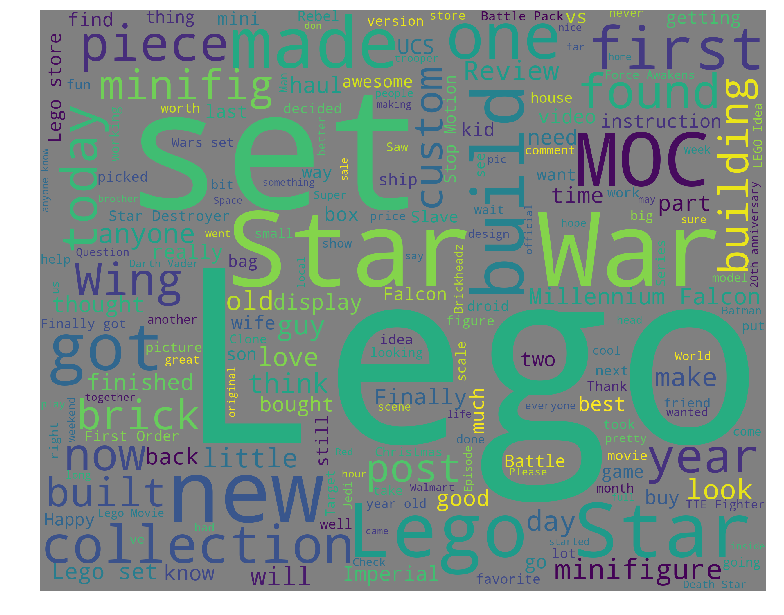

None Lego Words


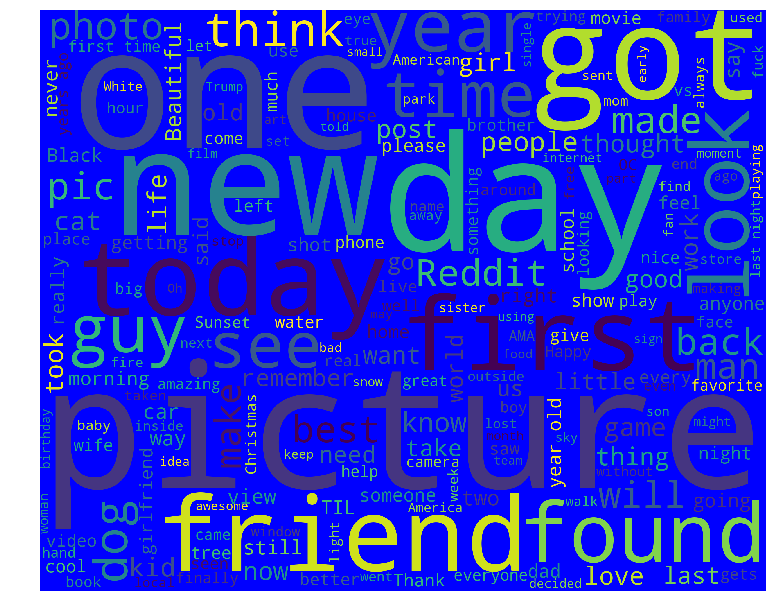

In [185]:
# This code was taken and modified from Heather Robbin's jupyter notebook on constructing word clouds.
def wordcloud_draw(make_cloud, color = 'black'):
    words = ' '.join(make_cloud)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color, 
#                           mode="RGBA",
                      width=2500,
                      height=2000,
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Lego_Words")
wordcloud_draw(lego_words, color = 'grey')
print("None Lego Words")
wordcloud_draw(none_lego_words, color = 'blue')

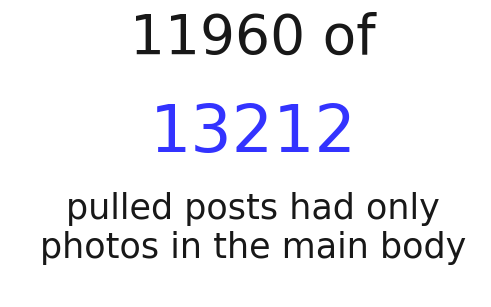

In [181]:
# 2.03-lesson-principles_of_data_visualization

number_photo = (negative_data['body'] == '').sum() + (positive_data['body'] == '').sum()

# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.9,                              # at vertical = 0.9
         s = str(number_photo)+ ' of',                          # content of text (string)
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 55,                            # font size = 35
         alpha = 0.9,                          # alpha = 0.6 --> 60% opaque; 40% clear
         color='black',)
#          bbox=dict(facecolor='red', alpha=0.5))
                                   # alpha = 0.6 --> 60% opaque; 40% clear


# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 125
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.55,
         s = df.shape[0],
         ha = 'center',
         va = 'center',
         size = 65,
         alpha = 0.8,
         color='blue')

# Create text:
# at (horizontal = 0.5, vertical = 0.25)
# stating "between January 1998 and August 2013"
# with a line break in between "1998" and "and"
# center-aligned
# font size 35
# alpha = 0.6 --> 40% clear; 60% opaque
plt.text(x = 0.5,
         y = 0.2,
         s = 'pulled posts had only\nphotos in the main body',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.9)

# No axes.
plt.axis('off');

# plt.savefig('./apple_ec_11403.png'); # use this to save your image in your directory

<font color = blue>Comparing the variance of the first constructed model with the variance of the final model.</font>

In [183]:
scores = {
    'train': [0.9695226561711575, 0.8751064433721261],
    'test' : [0.7956403269754768, 0.8475217555807795]
}


df = pd.DataFrame(scores)
df

,train,test
0,0.969523,0.795640
1,0.875106,0.847522


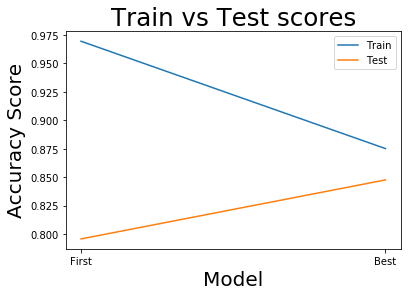

In [184]:

plt.plot(df['train'])
plt.plot(df['test'])

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.); # This will control the legend    

plt.legend(loc = 'upper right', labels=['Train', 'Test'])
plt.xticks(ticks = [0, 1], labels = ['First', 'Best']);
plt.xlabel('Model', size=20);
plt.ylabel('Accuracy Score', size=20);
plt.title('Train vs Test scores', size=24.5);